# Najbolj popularna piva na svetu

### Projektna naloga pri predmetu Programiranje 1

V tej projektni nalogi bom analiziral piva s pomočjo podatkov, ki jih bom analiziral s spletne strani https://www.beeradvocate.com/beer/top-rated/, kjer so podatki o 250 svetovno najbolj priljubljenih pivih na svetu.

Postavil sem si štiri hipoteze in sicer:
* med 250 najbolj priljubljenimi pivi je največ piv tipa "IPA" in najmanj piv tipa "PALE ALE"
* več kot polovica piv ima več kot 7% vsebovanost alkohola
* svetlo pivo je bolj priljubljeno od temnega
* najbolj priljubljene pivnice izdelujejo vsaj 3 vrste piva

Za začetek analize podatkov sem najprej pripravil delovno okolje.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

piva = pd.read_csv('../beer_ratings/csv_file.csv')

pd.options.display.max_rows = 10

%matplotlib inline

# 1. Predstavitev teme

In [2]:
piva

,MESTO,IME_PIVA,PIVNICA,VRSTA_PIVA,STOPNJA_ALKOHOLA,ST_GLASOV,AVG_OCENA
0,1,Kentucky Brunch Brand Stout,Toppling Goliath Brewing Company,American Imperial Stout,12.0,784,4.90
1,2,Marshmallow Handjee,3 Floyds Brewing Co.,Russian Imperial Stout,15.0,1696,4.81
2,3,Hunahpu's Imperial Stout - Double Barrel Aged,Cigar City Brewing,American Imperial Stout,11.0,1612,4.79
3,4,Barrel-Aged Abraxas,Perennial Artisan Ales,American Imperial Stout,11.0,1529,4.79
4,5,Heady Topper,The Alchemist,New England IPA,8.0,14621,4.76
...,...,...,...,...,...,...,...
245,246,Scaled Up,Trillium Brewing Company,New England IPA,8.0,934,4.46
246,247,Dragonsaddle,Hoof Hearted Brewing,New England IPA,11.5,338,4.50
247,248,Flora - Blueberry,Hill Farmstead Brewery,Belgian Saison,NaN,256,4.52
248,249,Madagascar,4 Hands Brewing Co.,English Sweet / Milk Stout,9.3,891,4.46


Razpredelnica 250 svetovno najbolj priljubljenih piv. Za vsako pivo je bilo na spletni strani na voljo 7 podatkov, ki so tudi imena stolpcev v razpredelnici.

### 1.1 Najbolje ocenjena piva

In [3]:
najboljse_ocene = piva.sort_values('AVG_OCENA', ascending=[False])
najboljse_ocene[0:10]

,MESTO,IME_PIVA,PIVNICA,VRSTA_PIVA,STOPNJA_ALKOHOLA,ST_GLASOV,AVG_OCENA
0,1,Kentucky Brunch Brand Stout,Toppling Goliath Brewing Company,American Imperial Stout,12.0,784,4.90
1,2,Marshmallow Handjee,3 Floyds Brewing Co.,Russian Imperial Stout,15.0,1696,4.81
2,3,Hunahpu's Imperial Stout - Double Barrel Aged,Cigar City Brewing,American Imperial Stout,11.0,1612,4.79
51,52,Very GGGreennn,Tree House Brewing Company,New England IPA,8.3,134,4.79
3,4,Barrel-Aged Abraxas,Perennial Artisan Ales,American Imperial Stout,11.0,1529,4.79
9,10,King JJJuliusss,Tree House Brewing Company,New England IPA,8.4,528,4.78
5,6,King Julius,Tree House Brewing Company,New England IPA,8.3,1090,4.77
11,12,SR-71,Toppling Goliath Brewing Company,American Imperial Stout,14.0,514,4.76
20,21,Zenne Y Frontera,Brouwerij 3 Fonteinen,Belgian Lambic,7.0,296,4.76
8,9,Very Hazy,Tree House Brewing Company,New England IPA,8.6,958,4.76


### 1.2 Piva, v katerih je največ alkohola

In [4]:
najbolj_alkoholizirana = piva.sort_values('STOPNJA_ALKOHOLA', ascending=[False])
najbolj_alkoholizirana[0:10]

,MESTO,IME_PIVA,PIVNICA,VRSTA_PIVA,STOPNJA_ALKOHOLA,ST_GLASOV,AVG_OCENA
110,111,Samuel Adams Utopias,Boston Beer Company (Samuel Adams),American Strong Ale,28.0,2692,4.54
125,126,Black Tuesday - Reserve,The Bruery,American Imperial Stout,20.5,267,4.61
116,117,Grey Monday,The Bruery,American Imperial Stout,19.9,1879,4.54
132,133,Mocha Wednesday,The Bruery,American Imperial Stout,19.9,1454,4.53
60,61,Chocolate Rain,The Bruery,American Imperial Stout,19.6,2816,4.59
56,57,Black Tuesday,The Bruery,American Imperial Stout,19.5,4093,4.59
95,96,A Deal With The Devil,Anchorage Brewing Company,American Barleywine,17.3,1092,4.57
99,100,It Was All A Dream,J. Wakefield Brewing,American Imperial Stout,17.0,127,4.74
212,213,Tweak,Avery Brewing Company,American Imperial Stout,16.0,2638,4.47
79,80,Bourbon Paradise,Prairie Artisan Ales,American Imperial Stout,15.9,503,4.61


### 1.3 Piva, za katera je glasovalo največ ljudi

In [5]:
najbolj_glasovana_piva = piva.sort_values('ST_GLASOV', ascending=[False])
najbolj_glasovana_piva[0:10]

,MESTO,IME_PIVA,PIVNICA,VRSTA_PIVA,STOPNJA_ALKOHOLA,ST_GLASOV,AVG_OCENA
89,90,Breakfast Stout,Founders Brewing Company,American Imperial Stout,8.3,17483,4.55
14,15,Pliny The Elder,Russian River Brewing Company,American Imperial IPA,8.0,15218,4.69
4,5,Heady Topper,The Alchemist,New England IPA,8.0,14621,4.76
26,27,KBS (Kentucky Breakfast Stout),Founders Brewing Company,American Imperial Stout,12.3,13713,4.65
164,165,Hopslam Ale,Bell's Brewery - Eccentric Café & General Store,American Imperial IPA,10.0,13708,4.49
22,23,Bourbon County Brand Stout,Goose Island Beer Co.,American Imperial Stout,14.7,12957,4.66
244,245,Enjoy By IPA,Stone Brewing,American Imperial IPA,9.4,11106,4.44
33,34,Zombie Dust,3 Floyds Brewing Co.,American Pale Ale (APA),6.2,10731,4.63
155,156,Abt 12,Brouwerij St. Bernardus NV,Belgian Quadrupel (Quad),10.0,9989,4.50
94,95,Trappistes Rochefort 10,Brasserie de Rochefort,Belgian Quadrupel (Quad),11.3,9662,4.55


# 2. Analiza podatkov

### 2.1 prva hipoteza
med 250 najbolj priljubljenimi pivi je največ piv tipa "IPA" in najmanj piv tipa "PALE ALE"

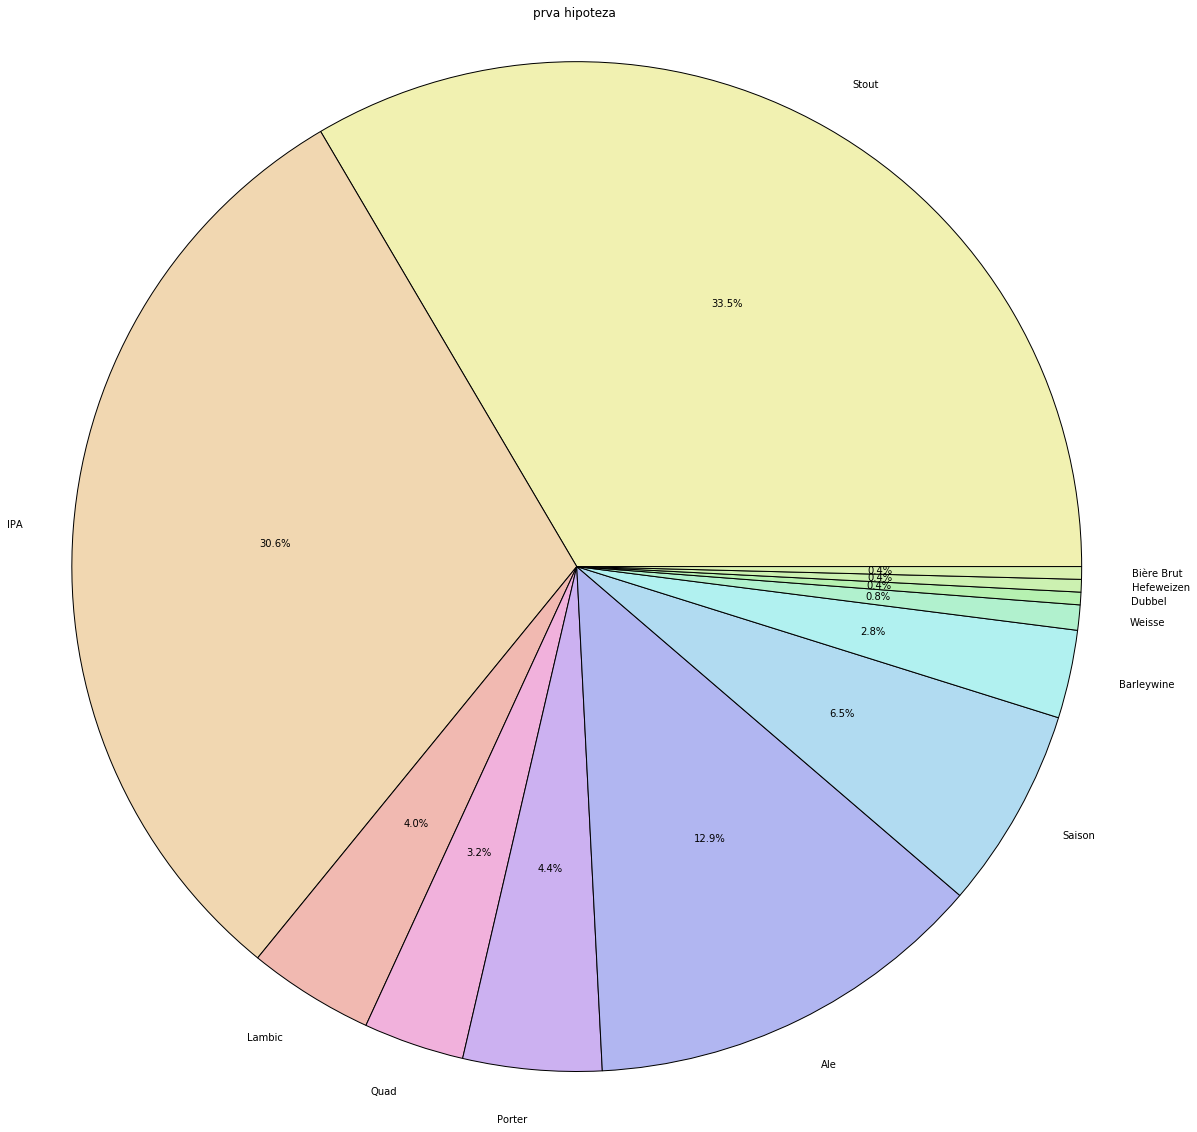

In [6]:
stevilo_tipov = ['Stout', 'IPA', 'Lambic', 'Quad', 'Porter', 'Ale', 'Saison', 'Barleywine', 'Weisse', 'Dubbel', 'Hefeweizen', 'Bière Brut']
vrste_piv = str()
ponovitve_piv = dict()
for vrsta in piva['VRSTA_PIVA']:
    vrste_piv += vrsta + ' '
for tip in stevilo_tipov:
    st_ponovitev = vrste_piv.count(tip)
    ponovitve_piv.update({tip:st_ponovitev})
ponovitve_piv
labels = list(ponovitve_piv.keys())
score = list(ponovitve_piv.values())
colors = ['#f1f1b1','#f1d7b1','#f1b9b1','#f1b1dc', '#ccb1f1', '#b1b6f1', '#b1dbf1', '#b1f1f0', '#b1f1ce', '#b6f1b1','#ccf1b1', '#daf1b1']
plt.pie(score, colors=colors,labels=labels, wedgeprops={'edgecolor':'black'}, autopct='%0.1f%%')
plt.title("prva hipoteza")
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.axis('equal')
plt.show()

### Rezultat
Iz rezultatov je jasno razvidno, da je bila priljubljenost piv tipa "IPA" rahlo precenjena, priljubljenost piv tipa "ALE" pa precej podcenjena.

### 2.2 druga hipoteza

več kot polovica piv ima vsebovanost alkohola višjo kot 7 %

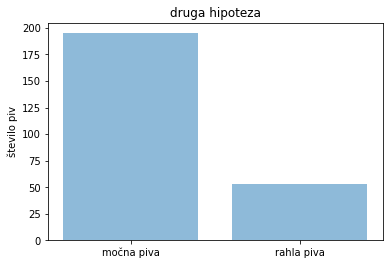

In [12]:
stopnje_alkohola = list()
rahla_piva = list()
močna_piva = list()
for i in range(251):
    try:
        stopnje_alkohola.append(piva['STOPNJA_ALKOHOLA'][i])
    except:
        pass #vsa piva nimajo podane vrednosti alkohola
for pivo in stopnje_alkohola:
    if pivo > 7:
        močna_piva.append(pivo)
    elif pivo <= 7:
        rahla_piva.append(pivo)
kategorije = ['močna piva', 'rahla piva']
število_piv = [len(močna_piva), len(rahla_piva)]
plt.bar(kategorije, število_piv, align='center', alpha=0.5)
plt.xticks(kategorije)
plt.ylabel('število piv')
plt.title('druga hipoteza')
plt.show()

### 2.3 tretja hipoteza
svetlo pivo je bolj priljubljeno od temnega

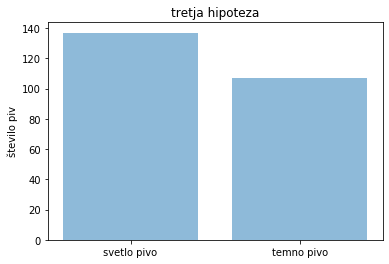

In [13]:
tipi = ['Stout', 'IPA', 'Lambic', 'Quad', 'Porter', 'Ale', 'Saison', 'Barleywine', 'Weisse', 'Dubbel', 'Hefeweizen', 'Bière Brut']
svetla = ['IPA', 'Lambic', 'Ale', 'Saison', 'Weisse', 'Hefeweizen']
temna = ['Stout', 'Quad', 'Porter', 'Barleywine', 'Dubbel', 'Bière Brut']
scounter = 0
dcounter = 0
for i in range(251):
    for pivo in tipi:
        try:
            if pivo in piva['VRSTA_PIVA'][i]:
                if pivo in svetla:
                    scounter += 1
                elif pivo in temna:
                    dcounter += 1
        except:
            pass
kategorije = ['svetlo pivo', 'temno pivo']
število_piv = [scounter, dcounter]
plt.bar(kategorije, število_piv, align='center', alpha=0.5)
plt.xticks(kategorije)
plt.ylabel('število piv')
plt.title('tretja hipoteza')
plt.show()

### 2.4 četrta hipoteza
najbolj priljubljene pivnice izdelujejo vsaj 3 vrste piva

# Zaključek